In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Function to generate a random NBD PMF with peak between 7 to 30 days
def generate_nbd_pmf(max_days=365, r_range=(3, 10), p_range=(0.1, 0.5)):
    """Generate a random Negative Binomial PMF with a peak between 7 to 30 days."""
    # Randomly choose r and p
    r = np.random.randint(r_range[0], r_range[1])  # Number of successes
    p = np.random.uniform(p_range[0], p_range[1])  # Probability of success
    
    # Generate the PMF for days 0 to max_days
    days = np.arange(0, max_days + 1)
    pmf = nbinom.pmf(days, r, p)
    pmf /= pmf.sum()  # Normalize the PMF
    
    # Calculate peak location (mode of the distribution)
    peak = np.argmax(pmf)
    
    # Check if peak is between 7 and 30 days, if not, regenerate
    while not (7 <= peak <= 30):
        r = np.random.randint(r_range[0], r_range[1])
        p = np.random.uniform(p_range[0], p_range[1])
        pmf = nbinom.pmf(days, r, p)
        pmf /= pmf.sum()
        peak = np.argmax(pmf)
    
    return days, pmf, r, p, peak

# Function to perform Bernoulli trials based on the generated PMF
def bernoulli_trial_per_day(pmf):
    """Perform Bernoulli trials for each day using the provided PMF."""
    trials = np.random.binomial(1, pmf)
    return trials

# Number of applications to simulate
num_applications = 3
max_days = 365

# Generate and simulate for each application
for i in range(num_applications):
    days, pmf, r, p, peak = generate_nbd_pmf(max_days)
    trials = bernoulli_trial_per_day(pmf)
    
    # Plot the PMF and Bernoulli trials
    plt.figure(figsize=(12, 6))
    
    # PMF Plot
    plt.subplot(1, 2, 1)
    plt.stem(days, pmf, basefmt=" ")
    plt.title(f'Application {i+1} - NBD PMF (r={r}, p={p:.2f}, Peak={peak} days)')
    plt.xlabel('Days After Application')
    plt.ylabel('Probability')
    plt.grid(True)
    
    # Bernoulli Trials Plot
    plt.subplot(1, 2, 2)
    plt.stem(days, trials, basefmt=" ")
    plt.title(f'Application {i+1} - Bernoulli Trials Outcome (1 = Decision, 0 = No Decision)')
    plt.xlabel('Days After Application')
    plt.ylabel('Decision (Binary)')
    plt.grid(True)
    
    # Show the plots
    plt.tight_layout()
    plt.show()
    
    # Print the first few days of the trials
    print(f"Application {i+1}: First 30 Days Bernoulli Trials Outcome")
    print(trials[:30])
    print('-' * 60)


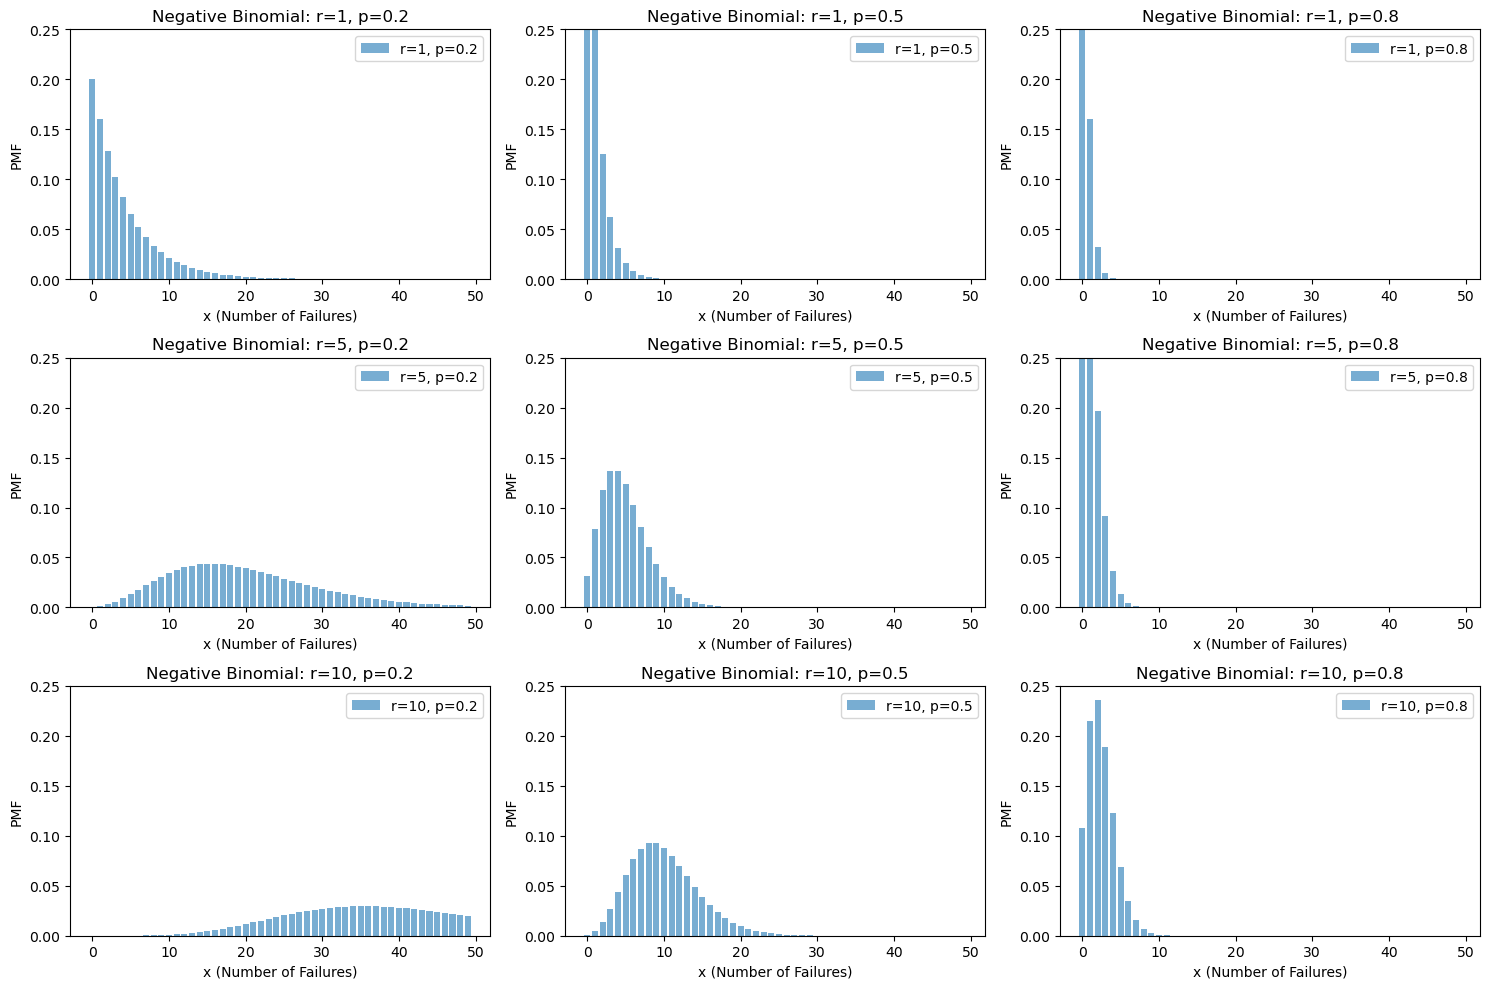

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Define parameters for the Negative Binomial Distribution
r_values = [1, 5, 10]  # Different values of r (shape parameter)
p_values = [0.2, 0.5, 0.8]  # Different values of p (success probability)
x = np.arange(0, 50)  # Values of the random variable

# Create subplots for visualizing the effect of r and p
plt.figure(figsize=(15, 10))

# Loop through combinations of r and p
for i, r in enumerate(r_values):
    for j, p in enumerate(p_values):
        # Compute the Negative Binomial PMF
        pmf = nbinom.pmf(x, r, p)
        
        # Plot the PMF
        plt.subplot(len(r_values), len(p_values), i * len(p_values) + j + 1)
        plt.bar(x, pmf, alpha=0.6, label=f'r={r}, p={p}')
        plt.title(f'Negative Binomial: r={r}, p={p}')
        plt.xlabel('x (Number of Failures)')
        plt.ylabel('PMF')
        plt.ylim(0, 0.25)
        plt.legend()

plt.tight_layout()
plt.show()
